# Welcome

## Initial setup

In [2]:
# Libs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
import numpy as np

## Hypothesis 1
### Siła SI (\% gier wygrywanych z innymi SI i człowiekiem) opartych o MCTS będzie wzrastać logarytmicznie wraz ze wzrostem liczby iteracji ekspansji MCTS.  

## Hypothesis 2
### Modyfikacja AMAF będzie miała większy wpływ na polepszenie jakości algorytmu MCTS niż savebridge pattern, jednak to zastosowanie obydwóch heurystyk da najlepsze wyniki. 

In [8]:
def load_data_hypo2(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True)
    return df

def create_bar_chart_hypo2(df, column, y_label, file_name, title):
    plt.figure(figsize=(15, 10))
    algorithms = df['Algorithm'].unique()
    game_sizes = df['GameSize'].unique()

    bar_width = 1.0 / (len(algorithms) + 1)
    colors = ['b', 'g', 'r', 'c', 'm']
    for i, alg in enumerate(algorithms):
        alg_data = df[df['Algorithm'] == alg]
        plt.bar(np.arange(len(game_sizes)) + i * bar_width, 
                alg_data[column],  
                width = bar_width, 
                color = colors[i % len(colors)], 
                align = 'center', 
                label = alg)
    plt.xticks(np.arange(len(game_sizes)) + bar_width / 2, game_sizes, fontsize=14)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Rozmiar gry', fontsize=15, fontweight='bold')
    plt.ylabel(y_label, fontsize=15, fontweight='bold')
    plt.legend(fontsize=15)
    plt.yticks(fontsize=14)

    plt.savefig(f"..\\images\\{file_name}", dpi=300)
    plt.show()

In [9]:
data_noswap = load_data_hypo2("..\\testresults\\hypo2\\winratio-results-noswap.txt")
data_swap = load_data_hypo2("..\\testresults\\hypo2\\winratio-results-swap.txt")

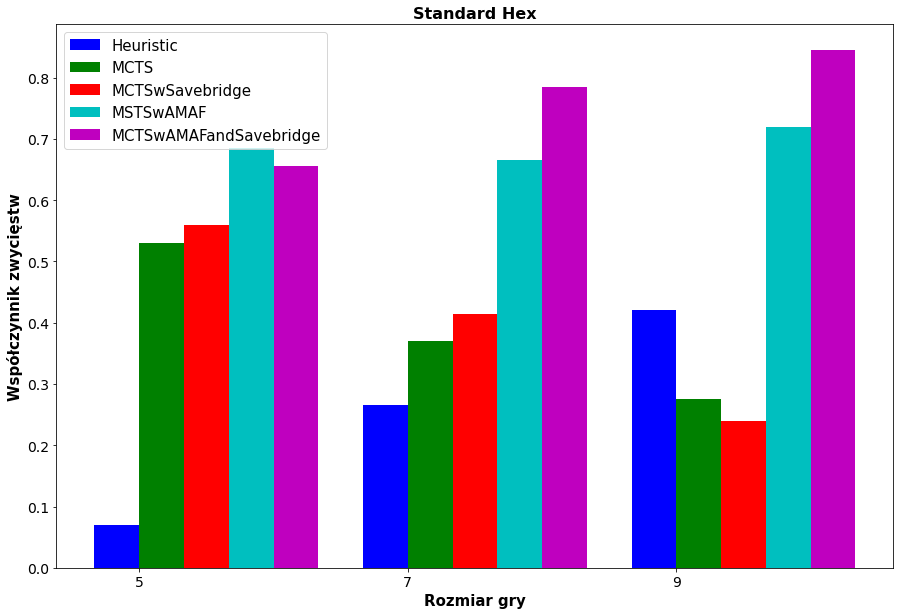

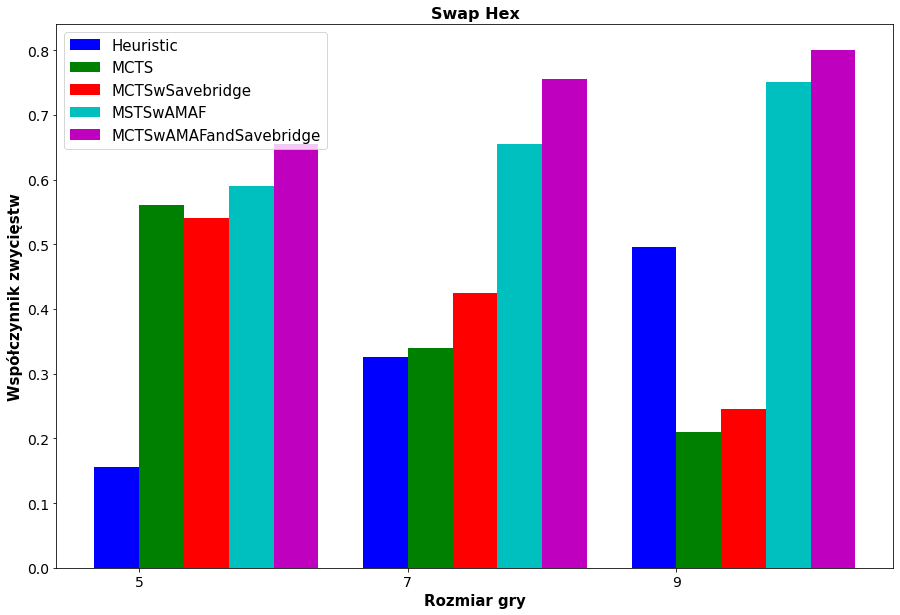

In [10]:
create_bar_chart_hypo2(data_noswap, 'WinRatio', 'Współczynnik zwycięstw', 'hypo2\\WinRatio-byGameSize-bar-noswap-plot.png', 'Standard Hex')
create_bar_chart_hypo2(data_swap, 'WinRatio', 'Współczynnik zwycięstw', 'hypo2\\WinRatio-byGameSize-bar-swap-plot.png', 'Swap Hex')

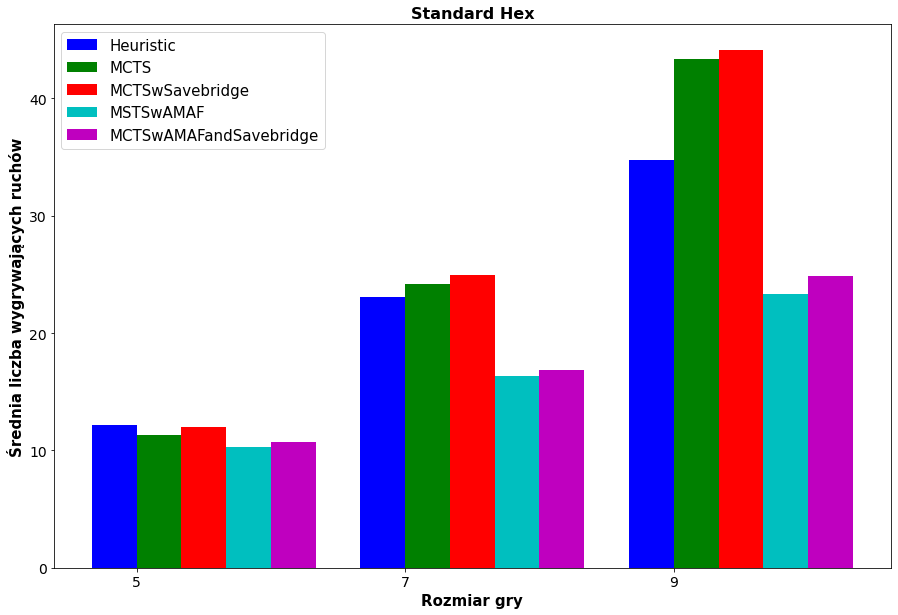

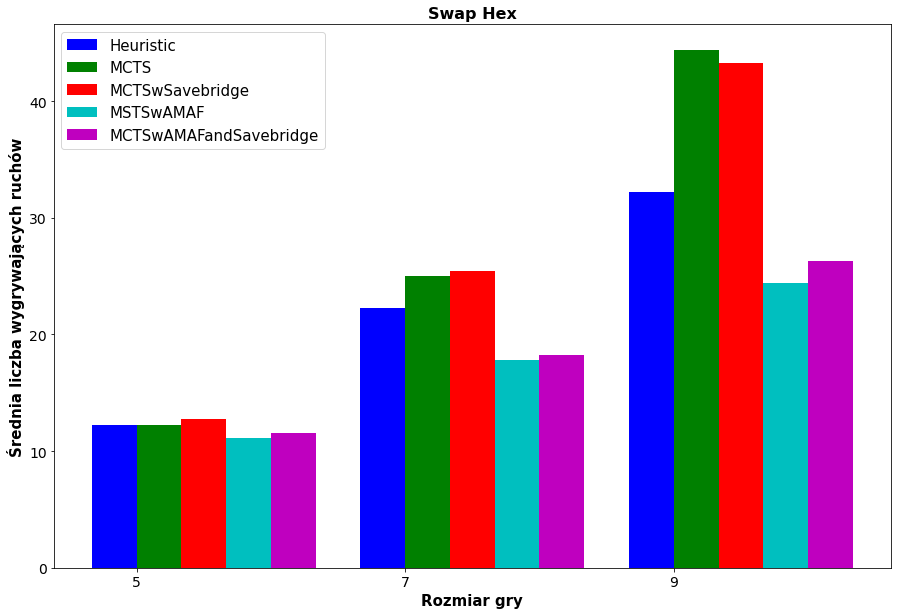

In [11]:
create_bar_chart_hypo2(data_noswap,'MeanNumberOfWinningMoves', 'Średnia liczba wygrywających ruchów', 'hypo2\\MeanNumberOfWinningMoves-byGameSize-bar-noswap-plot.png', 'Standard Hex')
create_bar_chart_hypo2(data_swap, 'MeanNumberOfWinningMoves', 'Średnia liczba wygrywających ruchów', 'hypo2\\MeanNumberOfWinningMoves-byGameSize-bar-swap-plot.png', 'Swap Hex')

## Hypothesis 3
### Algorytm heurystyczny nigdy nie przegra zaczynając w podstawowym wariancie gry. 

In [12]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]
    algorithms, win_ratios = zip(*(line.split() for line in lines))
    return [algorithm for algorithm in algorithms], [float(win_ratio) for win_ratio in win_ratios]

def create_bar_chart(algorithms, win_ratios):
    plt.figure(figsize=(14, 9))

    sns.set_style("whitegrid")
    barplot = sns.barplot(x=algorithms, y=win_ratios, palette="Blues_d")
    plt.xlabel('Algorytm grajacy przeciwko', fontsize=15, fontweight='bold')
    plt.ylabel('Współczynnik zwycięstw', fontsize=15, fontweight='bold')
    plt.title('Porównanie współczynnika zwycięstw algorytmu heurystycznego, podczas gry białymi w podstawowym wariancie gry', fontsize=16, fontweight='bold')

    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', 
                         va = 'center', 
                         xytext = (0, 10), 
                         textcoords = 'offset points',
                         fontsize = 12)
        
    plt.grid(True)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=12)
    
    plt.savefig(f"..\\images\\hypo3\\winration-plot.png", dpi=300)
    plt.show()

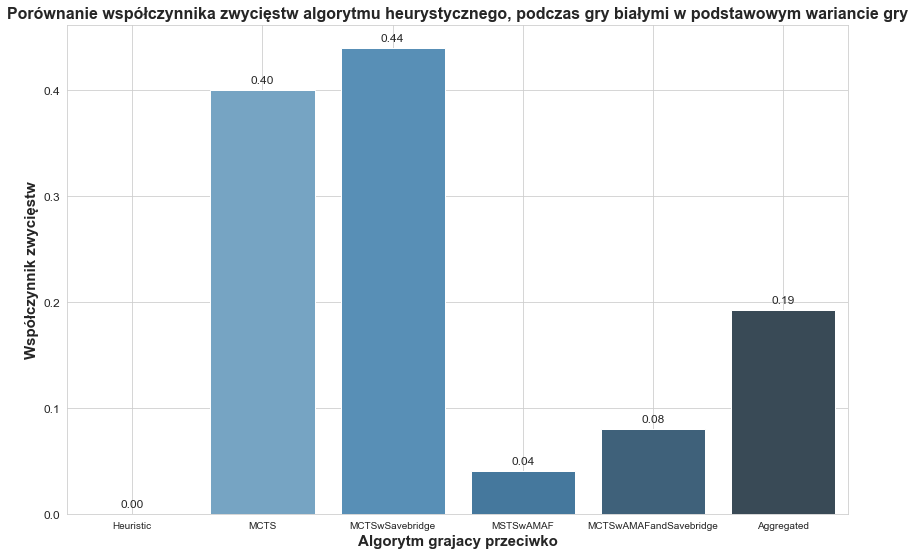

In [13]:
algorithms, win_ratios = load_data("..\\testresults\\hypo3\\winratio-results.txt")
create_bar_chart(algorithms, win_ratios)

## Hypothesis 4
### Od pewnej liczby iteracji ekspansji MCTS, algorytmy na nim oparte prawie nigdy nie będą przegrywać zaczynając w podstawowym wariancie gry.


In [14]:
def load_data_hypo4(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True)
    return df

def create_plot_hypo4(df, imageFilePath, size):
    plt.figure(figsize=(15, 10))
    grouped = df.groupby('Algorithm')
    for name, group in grouped:
        plt.plot(group['Iterations'], group['WinRatio'], label=name, linewidth=2.5)

    plt.title(f'Porównanie współczynnika zwycięstw algorytmów opartych o MCTS \n w rozgrywkach, w których rozpoczynali w podstawowym wariancie gry o rozmiarze {size}.', fontsize=16, fontweight='bold')
    plt.xlabel('Liczba iteracji', fontsize=15, fontweight='bold')
    plt.ylabel('Współczynnik zwycięstw', fontsize=15, fontweight='bold')
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.savefig(imageFilePath, dpi=300)
    plt.show()

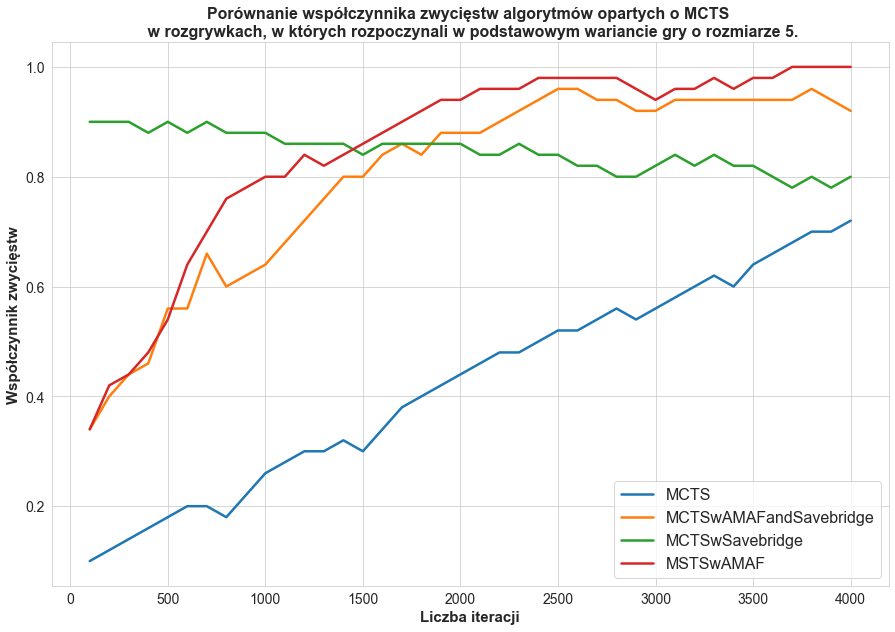

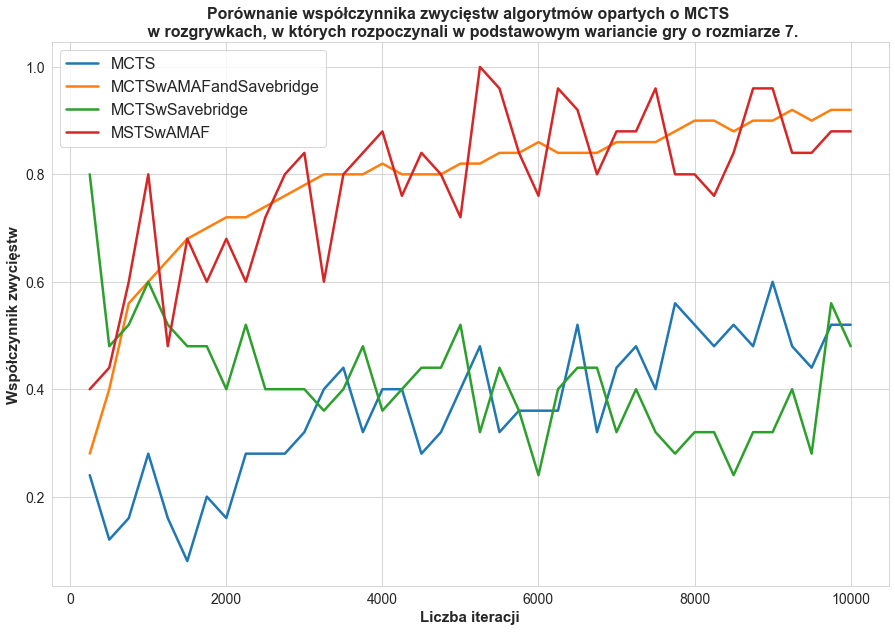

In [15]:
data_hex5 = load_data_hypo4("..\\testresults\\hypo4\\winratio-mcts-start-noswap-iterations-results-hex5.txt")
create_plot_hypo4(data_hex5, "..\\images\\hypo4\\winration-by-iteration-noswap-hex5.png", 5)

data_hex7 = load_data_hypo4("..\\testresults\\hypo4\\winratio-mcts-start-noswap-iterations-results-hex7.txt")
create_plot_hypo4(data_hex7, "..\\images\\hypo4\\winration-by-iteration-noswap-hex7.png", 7)

## Hypothesis 5
### Od pewnej liczby iteracji ekspansji MCTS, algorytmy na nim oparte zazwyczaj będą wygrywać z algorytmem heurystycznym w wariancie SWAP.

In [16]:
def load_data_hypo56(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True)
    return df

def create_plot_hypo56(df, imageFilePath, size, x_min=None, x_max=None):
    plt.figure(figsize=(15, 10))
    grouped = df.groupby('Algorithm')

    for name, group in grouped:
        plt.plot(group['Iterations'], group['WinRatio'], label=name, linewidth=2.5)

    plt.title(f'Porównanie współczynnika zwycięstw algorytmów opartych o MCTS, podczas gry \n przeciwko algorytmowi heurestycznemu w wariancie SWAP, na planszy o rozmiarze {size}.', fontsize=16, fontweight='bold')
    plt.xlabel('Liczba iteracji', fontsize=15, fontweight='bold')
    plt.ylabel('Współczynnik zwycięstw', fontsize=15, fontweight='bold')
    plt.legend(fontsize=15)

    if x_min is not None and x_max is not None:
        plt.xlim(x_min, x_max)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.savefig(imageFilePath, dpi=300)
    plt.show()

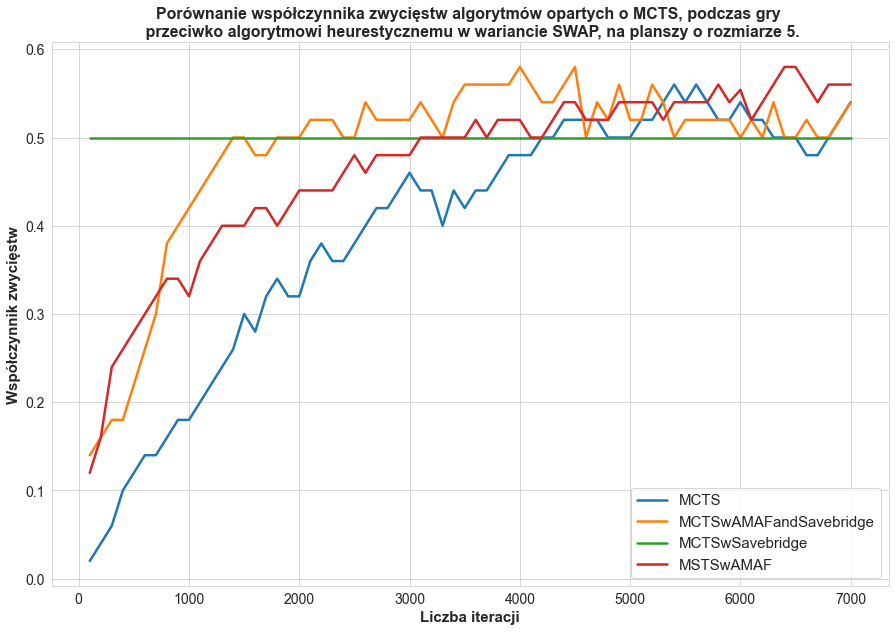

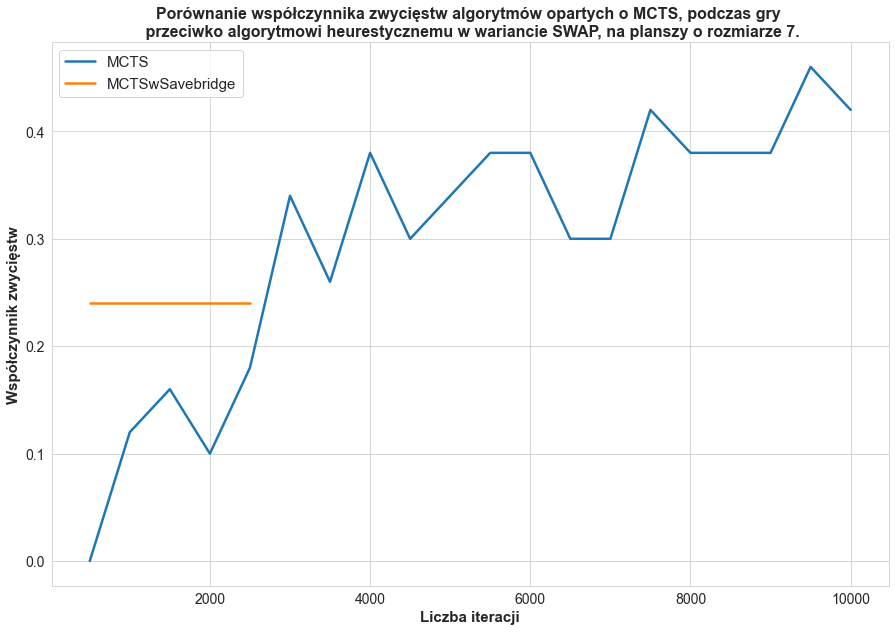

In [17]:
data_hypo56_hex5 = load_data_hypo56("..\\testresults\\hypo5\\winratio-iterations-results5.txt")
create_plot_hypo56(data_hypo56_hex5, "..\\images\\hypo5\\winration-by-iteration-swap-hex5.png", 5)

data_hypo56_hex7 = load_data_hypo56("..\\testresults\\hypo5\\winratio-iterations-results7.txt")
create_plot_hypo56(data_hypo56_hex7, "..\\images\\hypo5\\winration-by-iteration-swap-hex7.png", 7)